<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>

# CUDA Python與Numba簡介

**[CUDA](https://en.wikipedia.org/wiki/CUDA)**運算平台讓開發者能夠在NVIDA GPU上以大規模平行的方式執行程式碼，藉此大幅加快應用程式速度。

**[Numba](http://numba.pydata.org/)**是一種即時化 Python函數編譯器，提供用於加快數值強調型Python函數速度的簡單介面。對於希望GPU加速其應用程式但不想撰寫C/C++程式碼的Python程式設計師，且特別是對於已經在NumPy陣列上執行大量運算操作的開發者而言，Numba是極具吸引力的選擇。Numba可用於加速CPU和NVIDIA GPU上的Python函數。**本課程的重點在於說明透過Numba對Python應用程式進行GPU加速所需的基本技巧。**

## 課程架構

本課程包含**三**大部分：

- _CUDA Python與 Numba簡介_
- _在Python中利用 Numba客製 CUDA Kernel_
- _CUDA Python與 Numba中多維度 Grid與 Shared Memory_

上述每一部分各包含一個最終評估問題，您必須順利回答問題後才能夠獲得此課程的資格證書。每一部分的附錄中也包含相關進階參考資料。

### CUDA Python與Numba簡介

在第一段課程中，您將首先學習如何以Numba編譯用於CPU的函數，且將瞭解Numba編譯器的內部運作。接著您會學到如何在元素方面進行NumPy陣列函數的GPU加速，並認識一些用於在CPU主機與GPU裝置之間實現高效率資料移動的技術。

在第一段課程結束時，您將能夠針對在NumPy陣列上執行元素方面操作的Python程式碼實現GPU加速。

### 在Python中利用Numba客製CUDA Kernel

在第二段課程中，您將進一步學習如何透過撰寫自訂CUDA kernel，擴展您的能力，以便能夠在GPU上任意的啟動不僅是Element-wise, Numerically focused functions。為達成此一目標，您將學習NVIDIA GPU如何以平行方式執行程式碼。此外，您會接觸到幾種基礎的平行化技術，包括如何協調平行執行續的工作，以及如何解決Race conditions的問題。您也將學習對於在GPU上所執行程式碼進行除錯的技術。

在第二段課程結束時，您將掌握如何以GPU加速一維資料集上的多種Numerically focused functions。

### CUDA Python與Numba中多維度Grid與Shared Memory

在第三段課程中，您將開始進行二維資料的平行處理，且將學習如何利用GPU呼叫在GPU晶片中的Shared Memory。

在第三段課程結束時，您將能夠利用一維及二維資料集上的Numba以Python撰寫GPU加速程式碼，同時利用多種重要的最佳化策略撰寫高速的GPU加速程式碼。

## 必備基礎能力

* 撰寫Python的能力，特別是撰寫與執行函數、處理變數、迴圈和條件函數，以及Imports。
* 熟悉Python Numerically-focused的NumPy Python函式庫。若您從未用過NumPy，但熟悉Python，應能輕鬆掌握本段課程所討論的NumPy 使用。說明中於適當之處提供有實用的解釋和連結。
* 對於記憶體分配、數值類型、延遲以及處理核心等電腦科學術語的深入瞭解。
* 對於向量和矩陣以及矩陣乘法的基本認識。

## 本段目標

在您完成本段課程時，您將能夠：

- 利用Numba編譯用於CPU的 Python函數。
- 瞭解Numba如何編譯Python函數。
- GPU加速 NumPy ufuncs。
- GPU加速手寫向量化函數。
- 最佳化CPU主機與GPU裝置之間的資料轉移。

## Numba是什麼？

Numba是一個**專屬特定類型的即時化函數編譯器**，可針對用於CPU或GPU的**數值強調型** Python進行加速。以下分別說明所涉術語：

 * **函數編譯器(Function compiler)**: Numba編譯的是Python函數，並非整個應用程式，也不是部分函數。Numba並不是取代Python解譯器，而只是一個能夠將函數轉變為(通常是)更快速函數的Python模組。
 * **類型專門(Type-specializing)**: Numba是透過針對您所使用特定資料類型，產生專門化實作，藉此加速函數。Python函數是用於運算泛型資料，因此靈活性高，但速度很慢。在實務上，我們只會使用少量引數類型呼叫函數，所以Numba會針對每組類型生成快速實作。
 * **即時化(Just-In-Time)**: Numba在您首次呼叫函數時，對函數進行翻譯。如此可確保編譯器知悉您將使用的引數類型，並且可讓Numba在Jupyter Notebook中的互動使用如同傳統應用程式一樣便利。
 * **數值強調型(Numerically-focused)**: Numba目前主要針對數值類型資料，像是int、float及complex。字串處理支援有限，且許多字串使用案例無法配合GPU。使用NumPy陣列有利於獲得Numba的最佳成果。

## Numba使用要求

Numba支援多種作業系統：

 * Windows 7或更新，32 及64位元
 * macOS 10.9或更新，64位元
 * Linux (幾乎全部 >= RHEL 5)，32位元及64位元

Python版本：

 * Python 2.7、3.4-3.6
 * NumPy 1.10或更新

多種硬體：

* x86、x86_64/AMD64 CPU
* NVIDIA CUDA GPU (Compute capability 3.0或更新，CUDA 8.0或更新)
* AMD GPU (Experimental patches)
* ARM (Experimental patches)

我們在本課程中將使用64位元的Linux及CUDA 9。

## 附加資訊: CUDA C/C++ vs. Numba vs. pyCUDA

Numba絕對不是以CUDA進行程式設計的唯一方法。CUDA中最常用的程式設計方式然是CUDA C/C++語言擴充。在Python方面，[pyCUDA](https://documen.tician.de/pycuda/)是除Numba之外的另一種GPU加速Python程式碼。本課程主要仍是著重Numba，但在開始前，要先略為介紹背景，將上述三種方法快速比較一下。

**CUDA C/C++**:
- 最常用且效能良好又富靈活性的CUDA使用方式
- 加速C/C++應用程式

**pyCUDA**:
- 提供整個CUDA C/C++ API
- 是Python能夠使用的CUDA選項中效能最佳的一種
- 需要在Python中撰寫C程式碼，且整體而言需要撰寫許多程式碼修改

**Numba**:
- 效能不如pyCUDA
- (尚)未接使用整個CUDA C/C++ API
- 仍可促成大幅加速，往往是在程式碼修改極少的情況下
- 方便開發者直接以Python撰寫程式碼
- 亦能最佳化CPU的Python程式碼

## 第一步：CPU的編譯

之前提到過Numba可最佳化用於CPU或GPU的程式碼。在討論GPU加速之前，我們要先來撰寫自己的第一個Numba函數，並針對**CPU**的使用來進行編譯。如此除了有助於學習Numba語法之外，稍後也能就CPU最佳化型Numba程式碼與GPU加速型Numba程式碼進行效能比較。

Numba編譯器通常是藉由在Python函數上套用[**函數修飾器(Function decorator)**](https://en.wikipedia.org/wiki/Python_syntax_and_semantics#Decorators)加以實現。所謂的修飾器是函數修改器，能夠使用極為簡單的語法，轉換其所修飾的Python函數。在此我們將使用Numba的CPU編譯修飾器`@jit`:

In [1]:
from numba import jit
import math

# This is the function decorator syntax and is equivalent to `hypot = jit(hypot)`.
# The Numba compiler is just a function you can call whenever you want!
@jit
def hypot(x, y):
    # Implementation from https://en.wikipedia.org/wiki/Hypot
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

我們試驗一下斜邊計算：

In [2]:
hypot(3.0, 4.0)

5.0

之後會進一步說明`hypot`呼叫時的情形，但現在，我們首次呼叫`hypot`，使得編譯器觸發後去編譯Float input的機器碼。Numba也以`.py_func`屬性儲存函數的原始Python程式，因此我們可以呼叫原始Python程式碼，確保獲得相同答案：

In [3]:
hypot.py_func(3.0, 4.0)

5.0

### 基準化分析

使用Numba的一個重要環節就是衡量新程式碼的效能。要知道我們是否真的達成些許加速效果，在本課程所執行Jupyter Notebook中最簡單的方式就是利用[`%timeit`magic function](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)。我們先來測量原本Python的速度：

In [4]:
%timeit hypot.py_func(3.0, 4.0)

629 ns ± 1.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


`%timeit`magic function多次運行這個陳述式，藉此獲得正確的運行時間估計值， 並且回覆預設最佳時間，可用於避免隨機背景事件影響您的測量。 取三次中最佳者的做法也能確保第一次呼叫的編譯時間不會影響結果：

In [5]:
%timeit hypot(3.0, 4.0)

188 ns ± 0.0274 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Numba在這個函數上表現頗佳，肯定較純Python版本更快。當然，`hypot`函數已經存在於Python模組，我們來看看比較的情形：

In [6]:
%timeit math.hypot(3.0, 4.0)

118 ns ± 0.0645 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Python的內建甚至比Numba還要快！這是因為Numba在每次函數呼叫時都會產生比Python本身函數呼叫開銷更大的開銷，而這會對超快速函數(如上述)造成效能上的損失。(順帶說明，若您是從另一個Numba函數呼叫Numba函數，則函數開銷極低，且若編譯器將函數內嵌到另一個函數中，開銷甚至為零。簡言之，請務必就您的函數進行基準化分析以獲得速度提升的證明。)

### 練習: 以Numba編譯用於CPU的函數

以下函數是使用[蒙地卡羅法判斷Pi](https://academo.org/demos/estimating-pi-monte-carlo/)(原始碼來自[Numba首頁](http://numba.pydata.org/))。這個函數本身已經在作用，因此我們無需擔心數學實作的內容。

完成兩個`TODO`，用Numba編譯`monte_carlo_pi`，之後再執行以下3個單元：

  1. 確認編譯過版本具有與未編譯版本相同的行為模式。
  2. 就未編譯版本進行基準化分析。
  3. 就編譯過版本進行基準化分析。

若有困難，請查看[解決方案](../../../../edit/tasks/task1/task/solutions/monte_carlo_pi_solution.py)。

In [7]:
nsamples = 1000000

In [8]:
# TODO: Import Numba's just-in-time compiler function
from numba import jit
import random

# TODO: Use the Numba compiler to compile this function
@jit
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x**2 + y**2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [9]:
# We will use numpy's `testing` library to confirm compiled and uncompiled versions run the same
from numpy import testing

# This assertion will fail until you successfully complete the exercise one cell above
testing.assert_almost_equal(monte_carlo_pi(nsamples), monte_carlo_pi.py_func(nsamples), decimal=2)

In [10]:
%timeit monte_carlo_pi(nsamples)

11 ms ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%timeit monte_carlo_pi.py_func(nsamples)

334 ms ± 629 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Numba如何運作

既然您已經動手開始使用Numba編譯器，現在我們來看看葫蘆裡賣的是什麼藥。第一次呼叫由Numba所包裹的`hypot`函數時，對應啟動的程序如下：

![Numba Flowchart](images/numba_flowchart.png "The compilation process")

我們可以看到使用`.inspect_types()`法產生的類型推斷結果，這種方法會輸出原始碼的標註版本：

In [12]:
hypot.inspect_types()

hypot (float64, float64)
--------------------------------------------------------------------------------
# File: <ipython-input-1-1ae6c289554e>
# --- LINE 6 --- 
# label 0
#   del x
#   del $0.1
#   del $0.3
#   del y
#   del $0.4
#   del $0.6
#   del $0.7
#   del $0.10
#   del y.1
#   del x.1
#   del $0.11
#   del $0.14
#   del t
#   del $0.17
#   del $0.19
#   del t.1
#   del $const0.21
#   del $0.24
#   del $0.25
#   del $0.20
#   del x.2
#   del $0.26
#   del $0.27

@jit

# --- LINE 7 --- 

def hypot(x, y):

    # --- LINE 8 --- 

    # Implementation from https://en.wikipedia.org/wiki/Hypot

    # --- LINE 9 --- 
    #   x = arg(0, name=x)  :: float64
    #   y = arg(1, name=y)  :: float64
    #   $0.1 = global(abs: <built-in function abs>)  :: Function(<built-in function abs>)
    #   $0.3 = call $0.1(x, func=$0.1, args=[Var(x, <ipython-input-1-1ae6c289554e> (9))], kws=(), vararg=None)  :: (float64,) -> float64
    #   x.1 = $0.3  :: float64

    x = abs(x);

    # --- LINE 10 -

請注意，Numba的類型名稱通常是映射[NumPy類型名稱](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html)，因此Python `float`就是`float64`(在其他語言中也稱為「雙精度」)。查看資料類型有時對於GPU程式碼而言十分重要，因為`float32`與`float64`運算的性能在CUDA裝置上會大不相同。若您的演算法能夠利用`float32`獲得正確結果，就該使用該種資料類型，否則使用`float64`可能會嚴重拖慢函數速度。

## Object Modes與Nopython Modes

Numba無法編譯所有Python程式碼。有些函數並無法轉譯成Numba，而有些Python類型(目前)根本無法獲得高效率的編譯。舉例而言，Numba並不支援Dictionaries。在此我們嘗試對一些Numba尚不知如何編譯的Python程式碼進行編譯：

In [13]:
@jit
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

'value'

有鑑於之前的討論，您可能會對於上方單元能夠順利執行感到訝異。這是因為預設的行為，Numba預設會退回到不進行類型專門化的**Object mode**。Object mode能夠啟動其他的Numba功能，但在許多情況下，我們希望Numba告訴我們類型推斷是否失敗。您可透過將`nopython`引數傳遞至修飾器，強制執行**nopython mode**(另一種編譯模式)：

In [14]:
@jit(nopython=True)
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

TypingError: Failed at nopython (nopython frontend)
Internal error at <numba.typeinfer.ArgConstraint object at 0x7fe31e4f8d30>:
--%<-----------------------------------------------------------------
Traceback (most recent call last):
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 137, in propagate
    constraint(typeinfer)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 190, in __call__
    typeinfer.add_type(self.dst, ty, loc=self.loc)
  File "/home/appuser/Miniconda3/lib/python3.6/contextlib.py", line 99, in __exit__
    self.gen.throw(type, value, traceback)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 265, in new_error_context
    six.reraise(type(newerr), newerr, sys.exc_info()[2])
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/six.py", line 658, in reraise
    raise value.with_traceback(tb)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
numba.errors.InternalError: 
[1] During: typing of argument at <ipython-input-14-d3b98ca43e8a> (3)
--%<-----------------------------------------------------------------

File "<ipython-input-14-d3b98ca43e8a>", line 3

This error may have been caused by the following argument(s):
- argument 0: cannot determine Numba type of <class 'dict'>


在Numba嘗試編譯函數時，我們得到異常結果，且若您向下捲動到異常輸出的結尾處，您會看到描述根本問題的錯誤：
```
- argument 0: cannot determine Numba type of <class 'dict'>
```

**使用`nopython`模式是我們推薦且符合最佳實務的`jit`使用方式，能夠產生最佳效能。**

Numba提供的另一種修飾器是`njit`，又稱為`jit(nopython=True)`:

In [15]:
from numba import njit

@njit
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

TypingError: Failed at nopython (nopython frontend)
Internal error at <numba.typeinfer.ArgConstraint object at 0x7fe31e4d6b00>:
--%<-----------------------------------------------------------------
Traceback (most recent call last):
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 137, in propagate
    constraint(typeinfer)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 190, in __call__
    typeinfer.add_type(self.dst, ty, loc=self.loc)
  File "/home/appuser/Miniconda3/lib/python3.6/contextlib.py", line 99, in __exit__
    self.gen.throw(type, value, traceback)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 265, in new_error_context
    six.reraise(type(newerr), newerr, sys.exc_info()[2])
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/six.py", line 658, in reraise
    raise value.with_traceback(tb)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
numba.errors.InternalError: 
[1] During: typing of argument at <ipython-input-15-598d254e6e01> (5)
--%<-----------------------------------------------------------------

File "<ipython-input-15-598d254e6e01>", line 5

This error may have been caused by the following argument(s):
- argument 0: cannot determine Numba type of <class 'dict'>


有關Numba所支援Python的詳細說明請參考[Numba文件](https://numba.pydata.org/numba-doc/dev/reference/pysupported.html)。

## 具有NumPy通用函數(ufuncs)的GPU用Numba簡介

以下說明Numba中的GPU程式設計，首先要瞭解的是如何編譯用於GPU的[NumPy通用函數\(又稱為ufuncs\)](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html)。

GPU程式設計的重點在於GPU硬體是為 *資料平行* 而設計。GPU在同時在眾多不同元素上執行相同運算時可以達到最高吞吐量。

NumPy通用函數是在NumPy陣列的每一元素上執行相同操作，本身就具有資料平行性質，因此與GPU程式設計可說是天作之合。

## 回顧 NumPy通用函數(ufuncs)

熟悉NumPy ufunc是學習本課程的先決條件，但若您並不熟悉或已有時日未再接觸，請參考以下的簡短介紹。若您在閱讀完本段簡介後，您對於陣列建立的基本NumPy機制和ufuncs仍有疑問，建議您接受為時一小時內的[NumPy快速入門教學](https://docs.scipy.org/doc/numpy/user/quickstart.html)。

NumPy具有通用函數(「ufuncs」)概念，這種函數能夠處理不同維度或純量的NumPy陣列，並逐元素地進行操作。

在以下範例中，我們要利用 NumPy `add` ufunc來演示基本的ufunc機制：

In [16]:
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

np.add(a, b) # Returns a new NumPy array resulting from adding every element in `a` to every element in `b`

array([11, 22, 33, 44])

Ufuncs也可將純量與陣列結合：

In [17]:
np.add(a, 100) # Returns a new NumPy array resulting from adding 100 to every element in `a`

array([101, 102, 103, 104])

也可藉由[*廣播 (Broadcasting)*](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html)這種技術來結合具有不同但相容維度的陣列，也就是複製較低維度陣列，使其符合較高維度陣列的維數。若有需要，請查看[`numpy.arange`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html)和[`numpy.ndarray.reshape`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.reshape.html)文件，兩者均於本課程中多次使用：

In [18]:
c = np.arange(4*4).reshape((4,4))
print('c:', c)

np.add(b, c)

c: [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[10, 21, 32, 43],
       [14, 25, 36, 47],
       [18, 29, 40, 51],
       [22, 33, 44, 55]])

## 製作用於GPU的ufuncs

Numba能夠創造 *編譯* 過的ufuncs，通常是一個涉及C程式碼的複雜程序。使用Numba您只需實現一個純量函數即可在不同的輸入執行，使用`@vectorize`加以修飾，並且Numba會為您找出廣播規則。若您熟悉[NumPy's `vectorize`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vectorize.html)，應也能輕易掌握Numba的`vectorize`修飾器。

在第一個範例中，我們要利用`@vectorize`修飾器來編譯並最佳化用於**CPU**的ufunc。

In [19]:
from numba import vectorize

@vectorize
def add_ten(num):
    return num + 10 # This scalar operation will be performed on each element

In [20]:
nums = np.arange(10)
add_ten(nums) # pass the whole array into the ufunc, it performs the operation on each element

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

我們可以產生一個在GPU上使用CUDA的ufunc，加上提供**明確的類型簽名**並設定`target`屬性。這個類型簽名引數描述用於ufuncs引數及回傳數值的類型：
```python
'return_value_type(argument1_value_type, argument2_value_type, ...)'
```

有關其他[可用類型](https://numba.pydata.org/numba-doc/dev/reference/types.html)，以及關於[撰寫具有多個簽名的ufuncs](https://numba.pydata.org/numba-doc/dev/user/vectorize.html)的其他資訊，請參閱Numba文件。

以下的簡單範例是對ufunc進行編譯，使其適用於支援CUDA的GPU裝置。期望有兩個`int64`值，且會回傳一個`int64`值：

In [21]:
@vectorize(['int64(int64, int64)'], target='cuda') # Type signature and target are required for the GPU
def add_ufunc(x, y):
    return x + y

In [22]:
add_ufunc(a, b)

array([11, 22, 33, 44])

這樣一個簡單的函數調用卻包含了許多動作！Numba自動：

 * 編譯CUDA kernel，以在所有輸入元素上平行執行ufunc操作。
 * 分配用於輸入及輸出的GPU記憶體。
 * 將輸入資料複製到GPU。
 * 根據輸入大小，以正確kernel維度執行CUDA kernel(GPU函數)。
 * 將結果從GPU複製回CPU。
 * 回傳結果，其形式為主機上的NumPy陣列。
 
相較於在C中的實作，以上的方式更為簡潔。

這個簡單的範例在GPU上有多快？讓我們來看看：

In [23]:
%timeit np.add(b, c)   # NumPy on CPU

1.17 µs ± 2.17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [24]:
%timeit add_ufunc(b, c) # Numba on GPU

657 µs ± 900 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


哇，GPU竟然比CPU*慢得多*？由於我們在這個範例中是(故意)以幾種方式誤用GPU，所以這樣的結果可想而知。我們誤用GPU的方式有助於釐清哪種問題最適合GPU運算，以及CPU有哪些問題要解決：

  * **輸入太小**: GPU是透過平行達成效能增加，一次操作數千筆數值，而我們的測試輸入分別只有4和16個整數，因此需要使用更大的陣列來保持GPU忙碌。
  * **計算太簡單**: 相較於在CPU上呼叫函數，把計算傳送到GPU頗需要一些開銷。若我們的計算涉及的數學運算不足(通常稱為「算術強度」)，則GPU會將大部分時間耗費在等候資料移動上。
  * **複製GPU往來資料**:雖然在某些情況下，為單一函數付出GPU往來資料的複製成本並非不划算，但通常較理想的方式是依序執行數項GPU操作。在這些案例中，應該傳送資料給GPU，並將資料留置於該處，直到所有處理完成為止。
  * **資料類型多於必要程度**: 我們的範例是使用`int64`，但可能並不需要。使用32及64位元資料類型的純量程式碼基本上執行速度與CPU相同，就整數類型而言，差異可能不大，但64位元浮點資料類型在GPU上卻需要很高的效能成本。64位元浮點上的基本算術會比32位元浮點慢2倍 (Pascal架構的Tesla GPU)到24倍 (Maxwell架構GeForce)不等。NumPy在建立陣列時預設為64位元資料類型，所以在需要32位元類型時必須設定[`dtype`](https://docs.scipy.org/doc/numpy-1.14.0/reference/arrays.dtypes.html)屬性或利用[`ndarray.astype()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.astype.html)法選取32位元類型。
  
  
根據以上，現在我們來嘗試一個在GPU上更快的範例，在此執行算術強度較高、輸入較大且使用32位元資料類型的操作：

In [25]:
import math # Note that for the CUDA target, we need to use the scalar functions from the math module, not NumPy

SQRT_2PI = np.float32((2*math.pi)**0.5)  # Precompute this constant as a float32.  Numba will inline it at compile time.

@vectorize(['float32(float32, float32, float32)'], target='cuda')
def gaussian_pdf(x, mean, sigma):
    '''Compute the value of a Gaussian probability density function at x with given mean and sigma.'''
    return math.exp(-0.5 * ((x - mean) / sigma)**2) / (sigma * SQRT_2PI)

In [26]:
import numpy as np
# Evaluate the Gaussian a million times!
x = np.random.uniform(-3, 3, size=1000000).astype(np.float32)
mean = np.float32(0.0)
sigma = np.float32(1.0)

# Quick test on a single element just to make sure it works
gaussian_pdf(x[0], 0.0, 1.0)

array([0.36235702], dtype=float32)

In [27]:
import scipy.stats # for definition of gaussian distribution, so we can compare CPU to GPU time
norm_pdf = scipy.stats.norm
%timeit norm_pdf.pdf(x, loc=mean, scale=sigma)

63.8 ms ± 404 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%timeit gaussian_pdf(x, mean, sigma)

4.28 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


改善幅度相當顯著，甚至包括複製GPU所有往來資料的開銷。在大型資料集上使用特殊函數(`exp`、`sin`、`cos`等等)的Ufuncs於GPU上的運行表現尤佳。

為完成比較，在Numba根據**CPU**的需要最佳化`gaussian_pdf`函數時，對此函數進行定義和計時：

In [29]:
@vectorize
def cpu_gaussian_pdf(x, mean, sigma):
    '''Compute the value of a Gaussian probability density function at x with given mean and sigma.'''
    return math.exp(-0.5 * ((x - mean) / sigma)**2) / (sigma * SQRT_2PI)

In [30]:
%timeit cpu_gaussian_pdf(x, mean, sigma)

23.5 ms ± 42.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


速度遠高於未編譯的CPU版本，但遠低於GPU加速版本。

## CUDA裝置函數

若您想要執行元素方面的操作，Ufuncs確實是非常適合這種常見任務的絕佳選擇。但對於許多函數而言並非如此。若要為GPU編譯的**並非**元素方面的函數，也就是向量化函數，應改使用`numba.cuda.jit`。在本課程的下個段落中將以較大篇幅討論`numba.cuda.jit`，但現在我們要來說明如何利用它來修飾要由GPU加速ufunc所使用的輔助函數，免得您得將所有邏輯塞進一個ufunc定義。

請注意，以下的`polar_to_cartesian`並不需要類型簽名，並且它傳遞的是兩個純量值，不像我們之前使用的向量化ufuncs (如以下的`polar_distance`)是以NumPy陣列為引數。

引數`device=True`表示修飾後的函數**只能夠**從運行在GPU上的函數呼叫，無法從CPU主機程式碼呼叫：

In [31]:
from numba import cuda

@cuda.jit(device=True)
def polar_to_cartesian(rho, theta):
    x = rho * math.cos(theta)
    y = rho * math.sin(theta)
    return x, y

@vectorize(['float32(float32, float32, float32, float32)'], target='cuda')
def polar_distance(rho1, theta1, rho2, theta2):
    x1, y1 = polar_to_cartesian(rho1, theta1) # We can use device functions inside our GPU ufuncs
    x2, y2 = polar_to_cartesian(rho2, theta2)
    
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

In [32]:
n = 1000000
rho1 = np.random.uniform(0.5, 1.5, size=n).astype(np.float32)
theta1 = np.random.uniform(-np.pi, np.pi, size=n).astype(np.float32)
rho2 = np.random.uniform(0.5, 1.5, size=n).astype(np.float32)
theta2 = np.random.uniform(-np.pi, np.pi, size=n).astype(np.float32)

In [33]:
polar_distance(rho1, theta1, rho2, theta2)

array([1.190657  , 1.6391649 , 0.26068142, ..., 1.4428519 , 1.6143302 ,
       1.6782469 ], dtype=float32)

#### 請注意，CUDA編譯器會積極促成裝置函數內嵌，因此通常不會產生函數呼叫開銷。同理，由`polar_to_cartesian`所回傳的「tuple」實際上並不是Python物件，而是暫時以結構體的形式表現，之後再由編譯器最佳化。

## GPU上可用的Python

相較於CPU上的Numba(已然受限)，GPU上的Numba限制更多。支援的Python包括：

* `if`/`elif`/`else`
* `while`及`for`迴圈
* 基本數學運算子
* 從`math`及`cmath`模組選出的函數
* 元組

詳情請參閱[Numba手冊](http://numba.pydata.org/numba-doc/latest/cuda/cudapysupported.html)。

### 練習：GPU加速函數

現在我們來對一個「zero suppression」函數進行GPU加速。處理波形時的常見操作是迫使所有小於特定幅度的樣本值成為零，藉此消除低幅雜訊。以下是一些樣本資料：

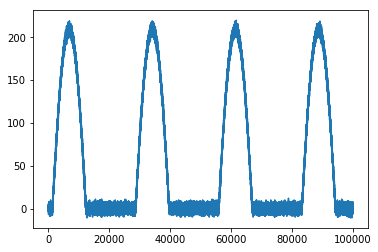

In [34]:
# This allows us to plot right here in the notebook
%matplotlib inline

# Hacking up a noisy pulse train
from matplotlib import pyplot as plt

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
waveform = ((pulses * 300) + noise).astype(np.int16)
plt.plot(waveform)

現在對此`zero_suppress`函數進行修飾，使其在CUDA裝置上能夠如同向量化ufunc般運作。若有問題請查看[解決方案](../../../../edit/tasks/task1/task/solutions/zero_suppress_solution.py)。

In [35]:
@vectorize(['int16(int16, int16)'], target='cuda')
def zero_suppress(waveform_value, threshold):
    if waveform_value < threshold:
        result = 0
    else:
        result = waveform_value
    return result

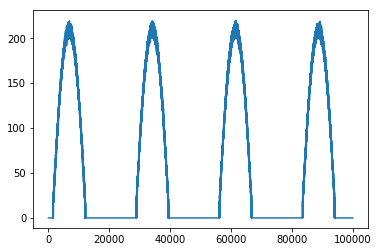

In [36]:
# This will throw an error until you successfully vectorize the `zero_suppress` function above.
# The noise on the baseline should disappear when zero_suppress is implemented
plt.plot(zero_suppress(waveform, 15))

## 管理GPU記憶體

截至目前為止，我們已經在CPU上利用NumPy陣列作為GPU函數的輸入和輸出。很方便的是，Numba已經自動幫我們將此資料傳送至GPU，使其可在GPU上運作。利用這樣的隱式資料傳輸，保守動作的Numba會在處理後自動將資料回傳CPU，這是一項時間密集度極高的操作。

[CUDA最佳實務指南](https://docs.nvidia.com/cuda/cuda-c-best-practices-guide/index.html)指示：

> **高優先度**: 最大限度地減少主機與裝置之間的資料傳輸，即使這意味著要在相較於主機CPU運行並未顯示性能增益的裝置上運行某些Kernel。

有鑑於此，我們應該考慮如何預防資料自動傳回主機，以便我們對資料進行額外處理，等到真正就緒時在將之複製回主機。

具體做法是建立**CUDA裝置陣列**並將之送至我們的GPU函數。這些裝置陣列在處理後不會自動傳回主機，並且可以在結束之前在設備上重複使用，並且僅在必要時將它們或其中的一部分發送回主機。

為提供證明，再次建立我們的範例加法ufunc：

In [37]:
@vectorize(['float32(float32, float32)'], target='cuda')
def add_ufunc(x, y):
    return x + y

In [38]:
n = 100000
x = np.arange(n).astype(np.float32)
y = 2 * x

In [39]:
%timeit add_ufunc(x, y)  # Baseline performance with host arrays

1.11 ms ± 833 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


`numba.cuda`模組包含一個可將主機資料複製到GPU並回傳CUDA 裝置陣列的函數。請注意，當我們嘗試列印裝置陣列的內容時，我們只會得到關於陣列的資訊，而不是陣列的實際內容。這是因為資料位於裝置上，需要轉移回主機才能列印出數值，我們將於稍後說明做法：

In [ ]:
from numba import cuda

x_device = cuda.to_device(x)
y_device = cuda.to_device(y)

print(x_device)
print(x_device.shape)
print(x_device.dtype)

(100000,)
float32


裝置陣列可以如同NumPy陣列一樣傳送到CUDA函數，但不會產生複製開銷：

In [ ]:
%timeit add_ufunc(x_device, y_device)

因為`x_device`和`y_device`已經在裝置上，這個基準的速度提升很多。

但即使我們在上方的單元內並不是真的將陣列指派給變數，我們現在仍是為ufunc的輸出分配裝置陣列，並將之複製回主機。為避免這個現象，我們可以用[`numba.cuda.device_array()`](https://numba.pydata.org/numba-doc/dev/cuda-reference/memory.html#numba.cuda.device_array)函數建立輸出陣列：

In [ ]:
out_device = cuda.device_array(shape=(n,), dtype=np.float32)  # does not initialize the contents, like np.empty()

接著我們可以對ufunc使用特別的`out`關鍵字引數，指定輸出緩衝：

In [ ]:
%timeit add_ufunc(x_device, y_device, out=out_device)

對`add_ufunc`的呼叫並不涉及主機與裝置之間的資料傳輸，因此能夠以最快的速度運行。若想要將裝置陣列帶回到主機記憶體，可以利用`copy_to_host()`法：

In [ ]:
out_host = out_device.copy_to_host()
print(out_host[:10])

雖然當我們使用主機陣列`a`和`b`時，有將隱式資料傳輸計入基準化分析，但由於我們使用裝置陣列時尚未對`to_device`呼叫進行基準化分析，您可能會認為比較的兩端不對等，您想的並沒有錯。當然，如上所述，我們的`add_func`函數並不特別適合GPU。以上只是做為說明如何消除傳輸之用。

在判斷往返GPU是否值得時，請務必就資料傳輸進行基準化分析。

Numba也提供其他的裝置記憶體管理和資料傳輸方法，詳情請參考[相關文件](https://numba.pydata.org/numba-doc/dev/cuda/memory.html)。

### 練習：最佳化記憶體移動

已知ufuncs：

In [ ]:
import math

@vectorize(['float32(float32, float32, float32)'], target='cuda')
def make_pulses(i, period, amplitude):
    return max(math.sin(i / period) - 0.3, 0.0) * amplitude

n = 100000
noise = (np.random.normal(size=n) * 3).astype(np.float32)
t = np.arange(n, dtype=np.float32)
period = n / 23

由於其目前位於下方單元中，在`make_pulses`與`add_ufunc`的呼叫之間會出現對主機的非必要資料往返，然後再回到裝置。

更新下方單元，以利用裝置分配，使操作成為：在呼叫`make_pulses`之前僅複製到裝置一次，並在呼叫`add_ufunc`之後複製回主機一次。若有問題請查看[解決方案](../../../../edit/tasks/task1/task/solutions/make_pulses_solution.py)。

In [ ]:
pulses = make_pulses(t, period, 100.0)
waveform = add_ufunc(pulses, noise)

In [ ]:
d_noise = cuda.to_device(noise)
d_t = cuda.to_device(t)
d_pulses = cuda.device_array(shape=(n,), dtype=np.float32)

make_pulses(d_t, period, 100.0, out=d_pulses)
waveform = add_ufunc(d_pulses, d_noise)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(waveform)

## 評估

以下練習需要您善用至今所學。此處與先前練習的差異在於，沒有解決方案程式碼供您使用，並且您必須執行幾個額外的步驟以「執行評估」並取得您作答的分數。**開始處理前請仔細閱讀指示，以便順利完成評估。**

### 如何進行評估

經執行以下步驟，完成評估：

1. 遵循以下指示，按照您一般進行練習的方式處理下方單元。
2. 達到您滿意的程度後，請遵循以下指示，複製程式碼並將之貼到連結的原始碼檔案中。貼入程式碼後請務必記得儲存檔案。
3. 回到您用於啟動此本筆記的瀏覽器分頁，然後點擊**「評估(Assess)」**鈕。數秒後會顯示分數以及實用訊息。

歡迎隨時點擊**評估**鈕，若您首次未能通過，您可額外修改程式碼並重複執行步驟1至3。祝您好運！

### 加速神經網路計算

以下是在神經網路中建立隱藏層所需作業的簡略版本，其正規化百萬灰階值(在此為隨機建立)，衡量其權重，並將之套用於激勵函數。

您的任務是運用所學技巧，將此工作移動至GPU，保持計算的正確性，並改善函數呼叫效能，依據`timeit`魔法函數，這些呼叫目前用時約*50毫秒*，可縮短至*5毫秒*以內。

在開始處理前，請謹記以下重點：

* 相較於每次函數調用皆在主機與裝置之間移動，這種將數值發送至裝置一次並將之留在裝置中歷經多次操作的做法是極大的改良。您已在課程中學到如何將裝置陣列用於輸出，並將之再次使用於 GPU上，無需來回進出主機。
* `np`數學函數無法用於裝置，必須改用`math`函數。

In [ ]:
# Do not modify this cell, these are the values that you will be assessed against.
import numpy as np
n = 1000000

greyscales = np.floor(np.random.uniform(0, 255, n).astype(np.float32))
weights = np.random.normal(.5, .1, n).astype(np.float32)

下方的單元是用於匯入函式庫、定義資料結構並定義函數。在做出修改後，要執行評估前，請將此單元的內容貼入[**`assessment/definitions.py`**](../../../../edit/tasks/task1/task/assessment/definitions.py)並加以儲存

In [ ]:
# Remember that we can't use numpy math function on the GPU...
from numpy import exp
import math
from numba import cuda
from numba import vectorize

# Consider modifying the 3 values in this cell to optimize host <-> device memory movement
normalized = np.empty_like(greyscales)
weighted = np.empty_like(greyscales)
activated = np.empty_like(greyscales)

# Modify these 3 function calls to run on the GPU
"""
def normalize(grayscales):
    return grayscales / 255

def weigh(values, weights):
    return values * weights
        
def activate(values):
    return ( np.exp(values) - np.exp(-values) ) / ( np.exp(values) + np.exp(-values) )
"""
@vectorize(['float32(float32)'],target='cuda')
def gpu_normalize(x):
    return x / 255

@vectorize(['float32(float32, float32)'],target='cuda')
def gpu_weigh(x, w):
    return x * w

@vectorize(['float32(float32)'],target='cuda')
def gpu_activate(x): 
    return ( math.exp(x) - math.exp(-x) ) / ( math.exp(x) + math.exp(-x) )


下方的單元是用於呼叫函數，利用來自上方單元的定義和資料。在未加修改的情況下，`timeit`報告的運行時間約為*50毫秒*。您的任務是加快速度，明確控制資料傳輸，使得對於三個函數的呼叫時間縮短到*5毫秒*以內。

在做出修改後，要執行評估前，請將此單元的內容貼入[**`assessment/calls.py`**](../../../../edit/tasks/task1/task/assessment/calls.py) 並加以儲存。**重點：評估會用`SOLUTION`的名稱檢查陣列，因此不論您是如何重構程式碼，請確定最終結果是儲存在名為`SOLUTION`的陣列中。**

In [ ]:
%%timeit
# Feel free to modify the 3 function calls in this cell
"""
normalized = normalize(greyscales)
weighted = weigh(normalized, weights)
SOLUTION = activate(weighted)
"""
# transfer inputs to the gpu
greyscales_gpu = cuda.to_device(greyscales)
weights_gpu = cuda.to_device(weights)

# create intermediate arrays and output array on the GPU
normalized_gpu = cuda.device_array(shape=(n,), dtype=np.float32)
weighted_gpu = cuda.device_array(shape=(n,), dtype=np.float32)
activated_gpu = cuda.device_array(shape=(n,), dtype=np.float32)

# calculation
normalized = gpu_normalize(greyscales_gpu, out=normalized_gpu)
weighted = gpu_weigh(normalized_gpu, weights_gpu, out=weighted_gpu)
SOLUTION = gpu_activate(weighted_gpu, out=activated_gpu)

## 總結

完成本堂課程後，您能夠：

- 利用Numba編譯用於CPU的 Python函數。
- 得知Numba如何編譯函數
- GPU加速 NumPy ufuncs
- GPU加速手寫向量化函數。
- 優化CPU主機與GPU裝置之間的記憶體轉移。

## 下載內容

如需下載本篇筆記內容，請執行以下單元，然後點擊下方的下載連結。請注意：若您是在本機 Jupyter伺服器中執行此notebook，notebook中的部分檔案路徑連結可能會因配合我們本身平台的資料夾結構而失效。您仍可透過Jupyter檔案瀏覽器查看檔案。

In [ ]:
!tar -zcvf section1.tar.gz .

[下載本段檔案。](files/section1.tar.gz)

## 附錄：廣義Ufuncs

Ufuncs是在陣列輸入廣播純量函數，但若想要將較低維度的陣列函數廣播到較高維度的陣列上又如何？這稱為*廣義的ufunc* ("gufunc")，為ufuncs的應用開拓新的視野。

廣義需要一個在處理多重輸入時會顯示索引排序的*簽名*(勿與Numba 類型簽名混淆)，因此有點麻煩 。「gufunc」簽名的完整說明並非本文教學範圍，但您可參考以下資源：

* NumPy的gufuncs文件：https://docs.scipy.org/doc/numpy/reference/c-api.generalized-ufuncs.html
* Numba的gufuncs文件：http://numba.pydata.org/numba-doc/latest/user/vectorize.html#the-guvectorize-decorator
* Numba的CUDA gufuncs文件：http://numba.pydata.org/numba-doc/latest/cuda/ufunc.html#generalized-cuda-ufuncs

現在來撰寫我們自己的正規化函數。要用到的是陣列輸入，並沿著最後的維度計算L2範數。廣義ufuncs是以其輸出陣列為最後引數，而非回傳數值。若輸出為純量，則我們仍會接收到較陣列輸入少一個維度的陣列。舉例而言，計算陣列的列總和時，2D陣列輸入會產生一維陣列，3D陣列輸入會產生2D陣列。

In [ ]:
from numba import guvectorize
import math

@guvectorize(['(float32[:], float32[:])'], # have to include the output array in the type signature
             '(i)->()',                 # map a 1D array to a scalar output
             target='cuda')
def l2_norm(vec, out):
    acc = 0.0
    for value in vec:
        acc += value**2
    out[0] = math.sqrt(acc)

為進行測試，在單位圓上建構幾個點：

In [ ]:
angles = np.random.uniform(-np.pi, np.pi, 10)
coords = np.stack([np.cos(angles), np.sin(angles)], axis=1)
print(coords)

一如預期，L2基準為1.0，取決於四捨五入誤差：

In [ ]:
l2_norm(coords)

<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>